## Ordinary Differential Equations

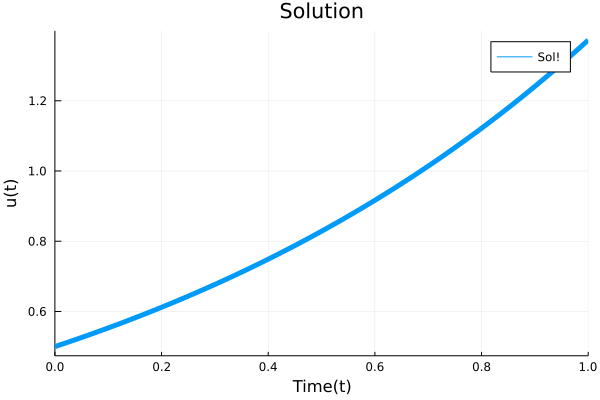

In [1]:
using DifferentialEquations
f(u,p,t) = 1.01*u
u0 = 1/2
tspan = (0.0, 1.0)
prob = ODEProblem(f, u0, tspan)
sol = solve(prob, Tsit5(), reltol=1e-8, abstol=1e-8)

using Plots
plot(sol, linewidth=5, title="Solution",
     xaxis="Time(t)", yaxis="u(t)"
     ,label="Sol!")

## Stochastic ODE

In [20]:
using Catalyst
sir_model = @reaction_network begin
    c1, s + i --> 2i
    c2, i --> r
end c1 c2

Model ##ReactionSystem#265 with 2 equations
States (3):
  s(t)
  i(t)
  r(t)
Parameters (2):
  c1
  c2

In [21]:
p = (0.1/1000, 0.01) # propensities
prob = DiscreteProblem(sir_model, [999, 1, 0], (0.0, 250.0), p)

jump_prob = JumpProblem(sir_model, prob, Direct())


Number of constant rate jumps: 0
Number of variable rate jumps: 0
Have a mass action jump


In [22]:
sol = solve(jump_prob, SSAStepper())

retcode: Default
Interpolation: Piecewise constant interpolation
t: 1795-element Vector{Float64}:
   0.0
   0.7321106839943581
   6.963678263756135
  11.276695583896263
  24.62121439554268
  24.7298728342731
  25.742759871142137
  26.604912921114018
  27.354915344135474
  27.479708195577217
  28.2839196029448
  29.43574534236761
  29.636083453903485
   ⋮
 241.4196068114452
 242.75656178639682
 243.7015407675674
 244.13151129452967
 245.18050178342273
 247.27270495024612
 247.4515630919152
 247.69567225760292
 248.55733074637146
 248.80592159353253
 248.8825417800862
 250.0
u: 1795-element Vector{Vector{Int64}}:
 [999, 1, 0]
 [998, 2, 0]
 [997, 3, 0]
 [996, 4, 0]
 [995, 5, 0]
 [994, 6, 0]
 [993, 7, 0]
 [992, 8, 0]
 [991, 9, 0]
 [990, 10, 0]
 [989, 11, 0]
 [988, 12, 0]
 [987, 13, 0]
 ⋮
 [0, 216, 784]
 [0, 215, 785]
 [0, 214, 786]
 [0, 213, 787]
 [0, 212, 788]
 [0, 211, 789]
 [0, 210, 790]
 [0, 209, 791]
 [0, 208, 792]
 [0, 207, 793]
 [0, 206, 794]
 [0, 206, 794]

In [23]:
plot(sol)